## EMPLOYEE SALARY PREDICTIONS USING SCIKIT-LEARN AND AWS SAGEMAKER LINEAR LEARNER

#### UNDERSTAND THE PROBLEM STATEMENT 

- The objective of this case study is to predict the employee salary based on the number of years of experience. 
- In simple linear regression, we predict the value of one variable Y based on another variable X.
- X is called the independent variable and Y is called the dependant variable.
- Why simple? Because it examines relationship between two variables only.
- Why linear? when the independent variable increases (or decreases), the dependent variable increases (or decreases) in a linear fashion.


#### IMPORT LIBRARIES AND DATASETS

In [1]:
# !pip install seaborn library
# !pip install seaborn
# !pip install tensorflow
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2025-02-02 20:02:03.570856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738526523.596556   32686 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738526523.603518   32686 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-02 20:02:03.626995: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# read the csv file 
salary_df = pd.read_csv('salary.csv')

In [3]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
salary_df.head(7)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150


In [5]:
salary_df.tail(7)

,YearsExperience,Salary
28,10.3,122391
29,10.5,121872
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [6]:
salary_df['Salary'].max()

139465

#### PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [7]:
# check if there are any Null values
# sns.heatmap(salary_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
# Check the dataframe info
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [9]:
# Statistical summary of the dataframe

salary_df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


MINI CHALLENGE
 - What are the number of years of experience corresponding to employees with minimum and maximim salaries?

In [10]:
salary_df[salary_df.Salary == salary_df.Salary.max()]['YearsExperience']

34    13.5
Name: YearsExperience, dtype: float64

In [11]:
salary_df[salary_df.Salary == salary_df.Salary.min()]['YearsExperience']

2    1.5
Name: YearsExperience, dtype: float64

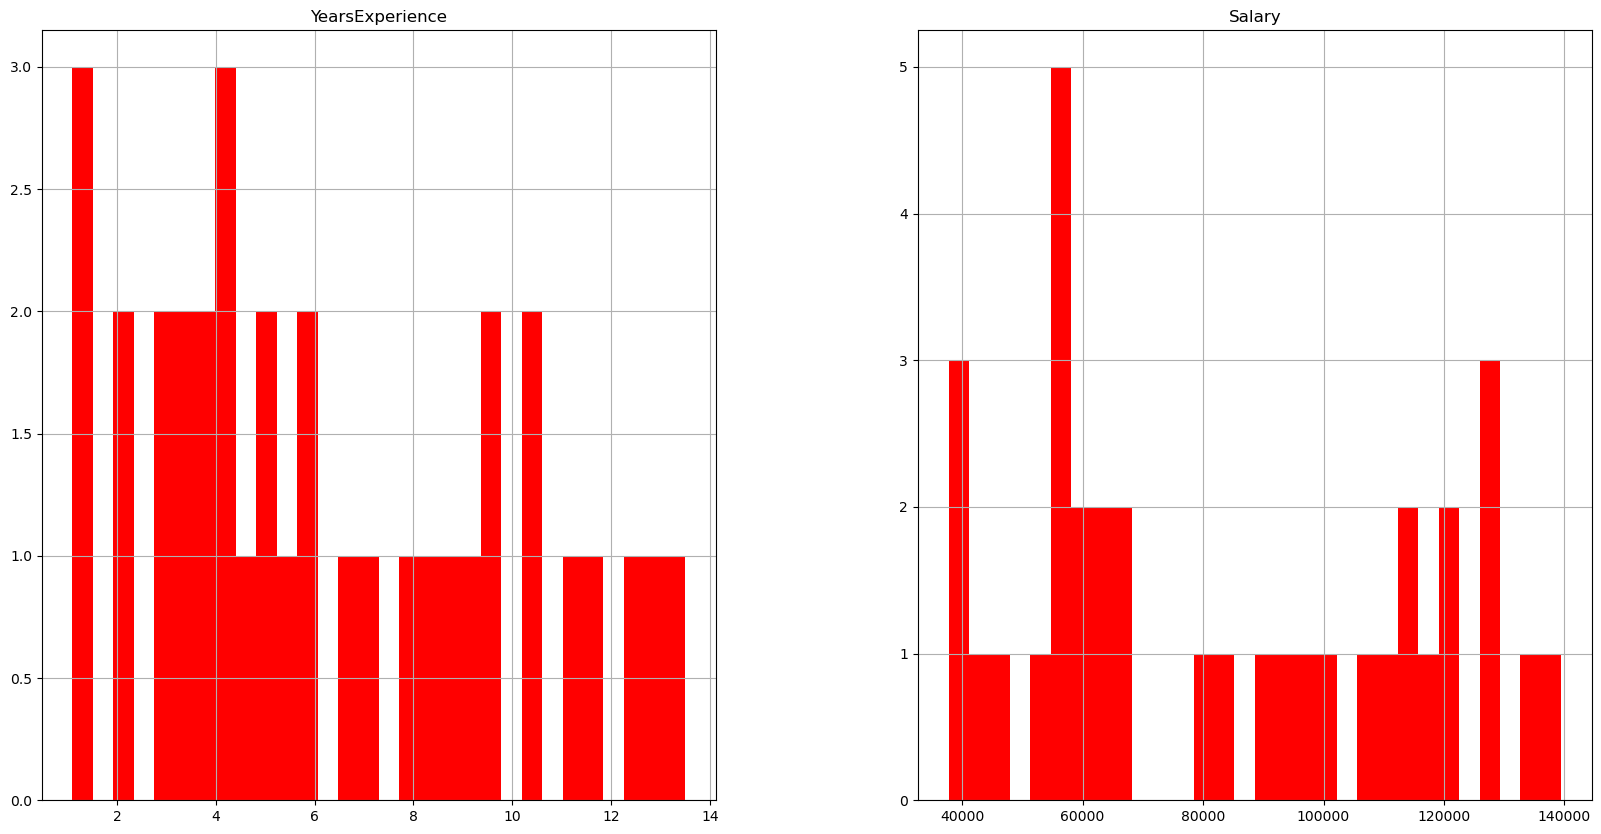

In [12]:
salary_df.hist(bins = 30, figsize = (20,10), color = 'r')
plt.show()

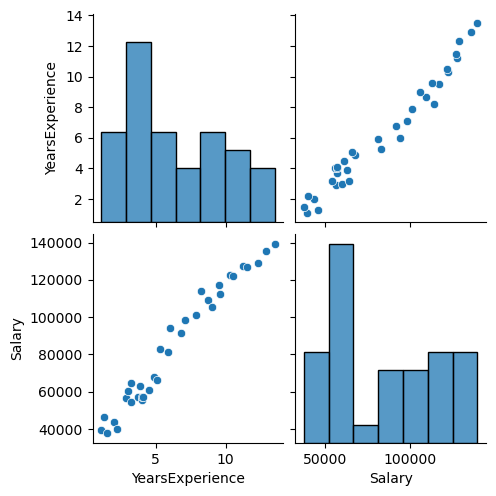

In [13]:
# plot pairplot
sns.pairplot(salary_df)
plt.show()

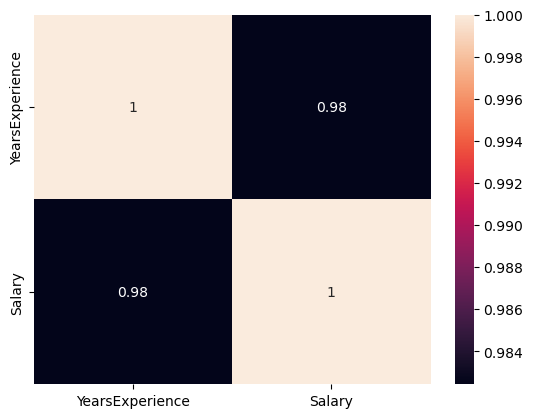

In [14]:
corr_matrix = salary_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

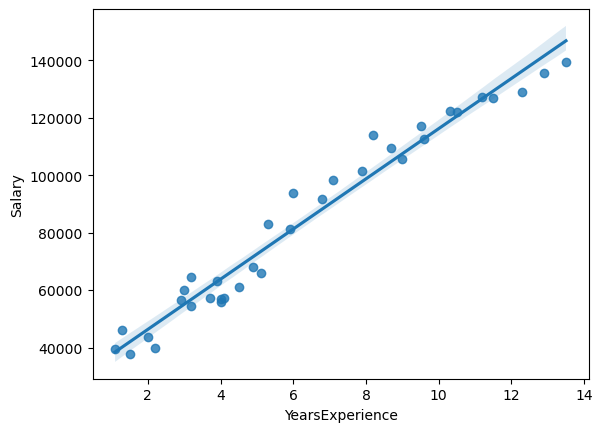

In [15]:
# draw regplot
sns.regplot(x = "YearsExperience", 
            y = "Salary", 
            data = salary_df)
 
# show the plot
plt.show()

#### CREATE TRAINING AND TESTING DATASETS

In [16]:
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]

In [17]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [18]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [19]:
X.shape

(35, 1)

In [20]:
y.shape

(35, 1)

In [21]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [22]:
# Only take the numerical variables and scale them
X 

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]], dtype=float32)

In [23]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape,X_test.shape

((28, 1), (7, 1))

MINI CHALLENGE
 - Try splitting the data into 75% for training and the rest for testing
 - Verify that the split was successful by obtaining the shape of both X_train and X_test
 - Did you notice any change in the order of the data? why?

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape,X_test.shape

((26, 1), (9, 1))

#### TRAIN A LINEAR REGRESSION MODEL IN SK-LEARN (SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [25]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression(fit_intercept = True)   # y-intercept can be non-zero
regression_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [26]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.9590454697608948

In [27]:
print('Linear Model Coefficient (m): ', regression_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regression_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[8539.727]]
Linear Model Coefficient (b):  [30478.934]


MINI CHALLENGE
- Retrain the model while setting the fit_intercept = False, what do you notice?

In [28]:
regression_model_sklearn_no_intercept = LinearRegression(fit_intercept = False)   # y-intercept can be non-zero
regression_model_sklearn_no_intercept.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [29]:
regression_model_sklearn_accuracy = regression_model_sklearn_no_intercept.score(X_test, y_test)
regression_model_sklearn_accuracy

0.8127247095108032

In [30]:
print('Linear Model Coefficient (m): ', regression_model_sklearn_no_intercept.coef_)
print('Linear Model Coefficient (b): ', regression_model_sklearn_no_intercept.intercept_)

Linear Model Coefficient (m):  [[12066.464]]
Linear Model Coefficient (b):  0.0


#### EVALUATE TRAINED MODEL PERFORMANCE (SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [31]:
y_predict = regression_model_sklearn.predict(X_test)

In [32]:
y_predict

array([[ 88549.08 ],
       [ 62075.92 ],
       [ 68907.7  ],
       [ 64637.84 ],
       [ 57806.06 ],
       [126123.875],
       [ 49266.332],
       [ 80863.32 ],
       [118438.125]], dtype=float32)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

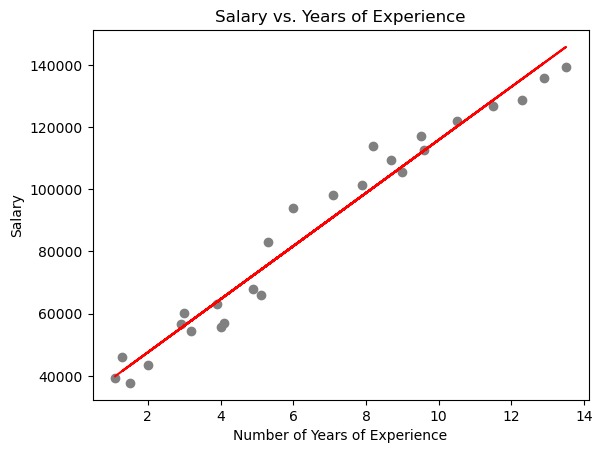

In [33]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regression_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary vs. Years of Experience')

MINI CHALLENGE
 - Use the trained model, obtain the salary corresponding to eployees who have years of experience = 5

In [34]:
y_predict_5 = regression_model_sklearn.predict([[5]])  # argument is a list
y_predict_5

array([[73177.56640625]])

In [35]:
type([[5]])

list

#### TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER

In [36]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session and define an S3 bucket since Sagemaker can only read and write to S3.
sagemaker_session = sagemaker.Session()
# bucket = Session().default_bucket()
# Let's define the S3 bucket and prefix that we want to use in this session
bucket = 'woodzee-data-science-projects' 
prefix = 'Sagemaker-Linear' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

[02/02/25 20:02:11] INFO     Found credentials from IAM Role:                                   ]8;id=659043;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=615076;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


                    INFO     Found credentials from IAM Role:                                   ]8;id=827930;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=653793;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

                    INFO     Found credentials from IAM Role:                                   ]8;id=111672;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=520650;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

arn:aws:iam::970547371282:role/service-role/AmazonSageMaker-ExecutionRole-20250202T133944


In [37]:
bucket

'woodzee-data-science-projects'

In [38]:
X_train.shape

(26, 1)

In [39]:
y_train = y_train[:,0]

In [40]:
y_train.shape

(26,)

In [41]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [42]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

[02/02/25 20:02:12] INFO     Found credentials from IAM Role:                                   ]8;id=169050;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py\credentials.py]8;;\:]8;id=383181;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/botocore/credentials.py#1075\1075]8;;\
                             BaseNotebookInstanceEc2InstanceRole                                                   

uploaded training data location: s3://woodzee-data-science-projects/Sagemaker-Linear/train/linear-train-data


In [43]:
X_test.shape

(9, 1)

In [44]:
y_test.shape

(9, 1)

In [45]:
# Make sure that the target label is a vector
y_test = y_test[:,0]
y_test.shape

(9,)

In [46]:
# Code to upload RecordIO data to S3

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_test, y_test)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [47]:
# Key refers to the name of the file    
key = 'linear-test-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)

# Let's print out the testing data location in s3
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://woodzee-data-science-projects/Sagemaker-Linear/test/linear-test-data


In [48]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://woodzee-data-science-projects/Sagemaker-Linear/output


In [49]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

                    WARNING  The method get_image_uri has been renamed in sagemaker>=2.          ]8;id=492970;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=165303;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

                    INFO     Same images used for training and inference. Defaulting to image     ]8;id=811018;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=796656;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#391\391]8;;\
                             scope: inference.                                                                     

                    INFO     Ignoring unnecessary instance type: None.                            ]8;id=84379;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py\image_uris.py]8;;\:]8;id=8691;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/image_uris.py#528\528]8;;\

In [50]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training
# sagemaker_session = sagemaker.Session()

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 1,  # years of experience
                           predictor_type = 'regressor',
                           mini_batch_size = 5,  # how many data points to be fed to the algorithm at one time
                           epochs = 50,
                           num_models = 32,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

[02/02/25 20:02:33] WARNING  train_instance_count has been renamed in sagemaker>=2.              ]8;id=879803;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=224782;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

                    WARNING  train_instance_type has been renamed in sagemaker>=2.               ]8;id=981922;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py\deprecations.py]8;;\:]8;id=686452;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/deprecations.py#34\34]8;;\
                             See: https://sagemaker.readthedocs.io/en/stable/v2.html for                           
                             details.                                                                              

                    INFO     SageMaker Python SDK will collect telemetry to help us better  ]8;id=90359;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py\telemetry_logging.py]8;;\:]8;id=30831;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/telemetry/telemetry_logging.py#90\90]8;;\
                             understand our user's needs, diagnose issues, and deliver                             
                             additional features.                                                                  
                             To opt out of telemetry, please disable via TelemetryOptOut                           
                             parameter in SDK defaults config. For more information, refer                         
                             to                                                                                    
                             https://sagemaker.readthedocs.io/en/stable/overview.html#confi                        
                             guring-and-using-defaults-with-the-sagemaker-python-sdk.                              

                    INFO     Creating training-job with name:                                       ]8;id=927289;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=481046;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#1042\1042]8;;\
                             linear-learner-2025-02-02-20-02-33-178                                                

2025-02-02 20:02:34 Starting - Starting the training job...
..25-02-02 20:02:49 Starting - Preparing the instances for training.
..25-02-02 20:03:13 Downloading - Downloading input data.
.......Docker entrypoint called with argument(s): train.
Running default environment configuration script
[02/02/2025 20:05:21 INFO 140490331744064] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin': '1.0', 'quantile': '0.5', 'loss_insensitivity': '0.01', 'huber_delta': '1.0', 'num_classes': '1', 'accuracy_top_k': '3', 'wd': 'auto', 'l1


2021-03-25 16:34:29 Uploading - Uploading generated training model
2021-03-25 16:34:29 Completed - Training job completed
Training seconds: 58
Billable seconds: 58


MINI CHALLENGE
- Try to train the model with more epochs and additional number of models
- Can you try to reduce the cost of billable seconds?

#### DEPLOY MODEL TO ENDPOINT AND TEST THE TRAINED LINEAR LEARNER MODEL 

In [60]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

[02/02/25 20:37:02] INFO     Creating model with name: linear-learner-2025-02-02-20-37-02-296       ]8;id=616256;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=215220;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4094\4094]8;;\

                    INFO     Creating endpoint-config with name                                     ]8;id=209;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=999613;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#5889\5889]8;;\
                             linear-learner-2025-02-02-20-37-02-296                                                

[02/02/25 20:37:03] INFO     Creating endpoint with name linear-learner-2025-02-02-20-37-02-296     ]8;id=598163;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=912926;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4711\4711]8;;\

--------!

In [61]:
from sagemaker.serializers import CSVSerializer, JSONSerializer
from sagemaker.deserializers import JSONDeserializer
from sagemaker.predictor import Predictor

# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

predictor = Predictor(endpoint_name='linear-learner-2025-02-02-20-37-02-296',
                      sagemaker_session=Session(),
                      serializer=CSVSerializer(),
                      deserializer=JSONDeserializer())


In [62]:
# making prediction on the test data

result = predictor.predict(X_test)

In [63]:
result # results are in Json format

{'predictions': [{'score': 87884.578125},
  {'score': 62558.5859375},
  {'score': 69094.328125},
  {'score': 65009.484375},
  {'score': 58473.75},
  {'score': 123831.140625},
  {'score': 50304.07421875},
  {'score': 80531.8671875},
  {'score': 116478.4375}]}

In [64]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [65]:
predictions

array([ 87884.578125  ,  62558.5859375 ,  69094.328125  ,  65009.484375  ,
        58473.75      , 123831.140625  ,  50304.07421875,  80531.8671875 ,
       116478.4375    ])

In [66]:
predictions.shape

(9,)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

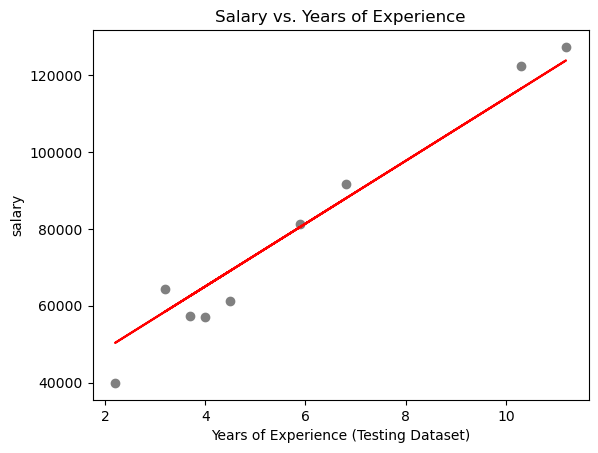

In [67]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('Years of Experience (Testing Dataset)')
plt.ylabel('salary')
plt.title('Salary vs. Years of Experience')

In [68]:
# Delete the end-point

linear_regressor.delete_endpoint()

[02/02/25 20:42:06] INFO     Deleting endpoint configuration with name:                             ]8;id=258577;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=271604;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4865\4865]8;;\
                             linear-learner-2025-02-02-20-37-02-296                                                

                    INFO     Deleting endpoint with name: linear-learner-2025-02-02-20-37-02-296    ]8;id=555690;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py\session.py]8;;\:]8;id=512820;file:///home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sagemaker/session.py#4855\4855]8;;\